In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # baseline model
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [78]:
df = pd.read_csv('data/new_df.csv')

In [79]:
df.sample(5) # before cleaning

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,year,month
6499,2012-03-08 01:00:00,1,0,1,1,18.86,22.725,63,22.0028,4,17,21,1,8,2012,3
3172,2011-08-02 02:00:00,3,0,1,1,27.88,31.820,69,0.0000,2,6,8,2,2,2011,8
10135,2012-11-07 16:00:00,4,0,1,2,13.12,14.395,53,23.9994,23,250,273,16,7,2012,11
9682,2012-10-07 19:00:00,4,0,0,2,16.40,20.455,82,7.0015,17,97,114,19,7,2012,10
10863,2012-12-19 01:00:00,4,0,1,1,12.30,15.910,65,6.0032,1,14,15,1,19,2012,12


In [80]:
df.shape

(10886, 16)

### Removing unwanted columns

In [81]:
df.drop(columns=['datetime', 'casual', 'registered', 'atemp', 'windspeed', 'holiday', 'humidity'], axis=1, inplace=True)

In [82]:
df.head() # after cleaning

,season,workingday,weather,temp,count,hour,day,year,month
0,1,0,1,9.84,16,0,1,2011,1
1,1,0,1,9.02,40,1,1,2011,1
2,1,0,1,9.02,32,2,1,2011,1
3,1,0,1,9.84,13,3,1,2011,1
4,1,0,1,9.84,1,4,1,2011,1


In [83]:
df.shape

(10886, 9)

### Seperate X and y

In [84]:
X = df.drop(columns=['count'])
y = df['count']

### Train Test Split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train

,season,workingday,weather,temp,hour,day,year,month
2815,3,1,1,27.88,5,6,2011,7
8695,3,0,1,36.90,16,4,2012,8
8406,3,1,1,32.80,15,11,2012,7
1543,2,0,2,14.76,4,10,2011,4
4952,4,0,1,13.12,10,19,2011,11
...,...,...,...,...,...,...,...,...
5734,1,0,1,6.56,2,14,2012,1
5191,4,0,1,11.48,9,10,2011,12
5390,4,0,1,11.48,16,18,2011,12
860,1,0,1,15.58,7,19,2011,2


### Model Building

In [87]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [88]:
# accuracy = accuracy_score(y_test, y_pred) # accuracy only for calssification problem

In [89]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [90]:
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 145.45
R² Score: 0.36


### Using advance models

In [91]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [92]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

In [93]:
print(f'Root-Mean-Squared-Error: {rmse:.2f}')
print(f'R2-score: {r2*100:.2f}%')

Root-Mean-Squared-Error: 46.30
R2-score: 93.50%


In [94]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_2 = r2_score(y_test, y_pred_xgb)

In [95]:
print(f'Root-Mean-Squared-Error: {rmse_2:.2f}')
print(f'R2-score: {r2_2*100:.2f}%')

Root-Mean-Squared-Error: 42.07
R2-score: 94.64%


### Model Performace Comparision

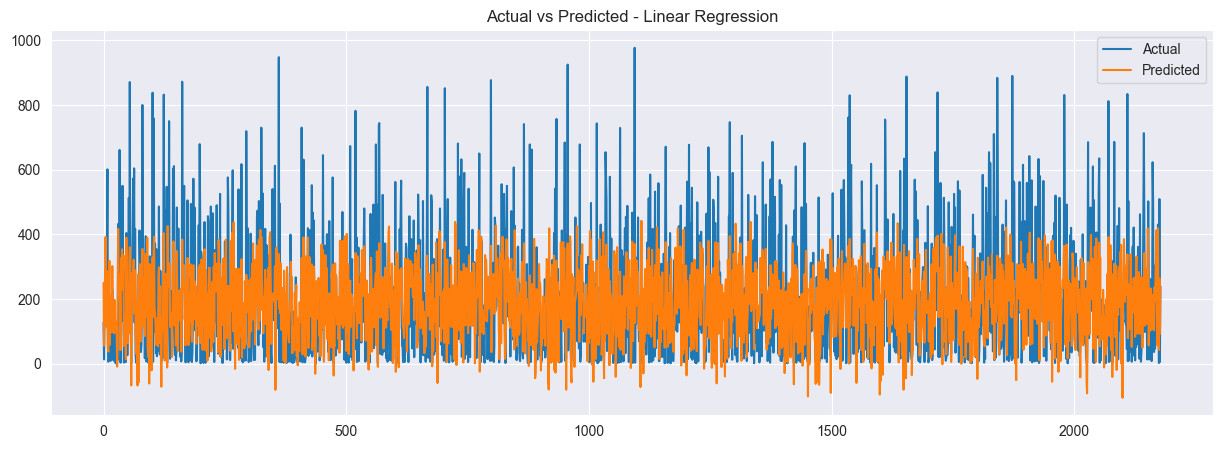

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(style='darkgrid')

plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

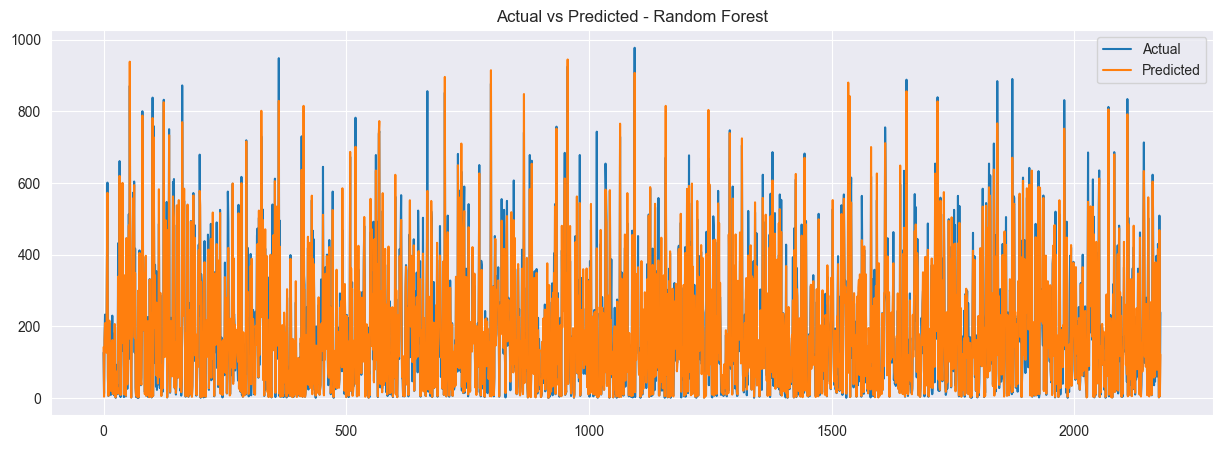

In [97]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_rf, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted - Random Forest")
plt.show()

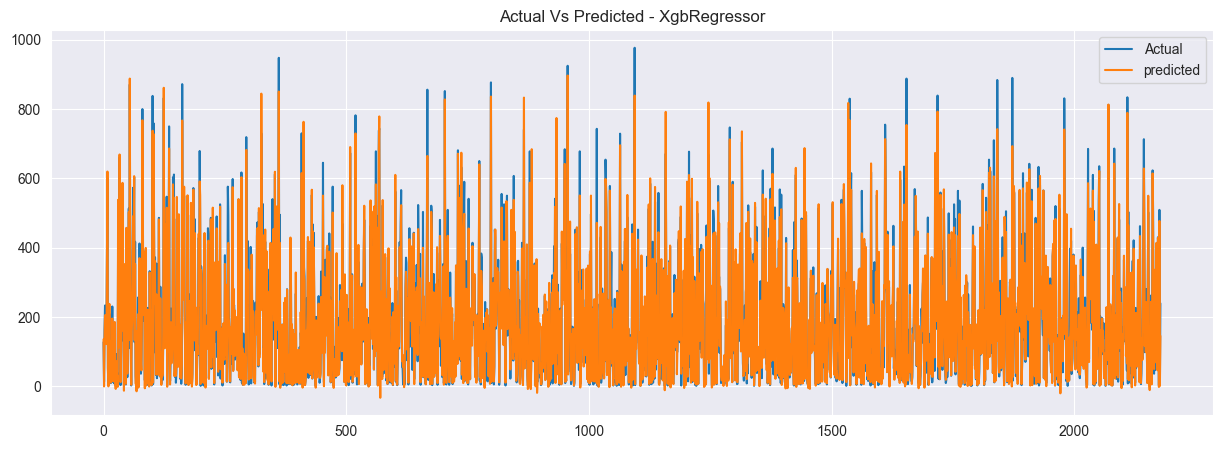

In [98]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_xgb, label='predicted')
plt.title('Actual Vs Predicted - XgbRegressor')
plt.legend()
plt.show()

### Save the Final Xgboost Model

In [99]:
import joblib
joblib.dump(xgb, 'model/xgboost_model.pkl')

['model/xgboost_model.pkl']